In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Advertising (2).csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
#no missing value treatment required as there is no missing values
#no encoding required as there are no object variables


In [6]:
#checking for outliers

In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


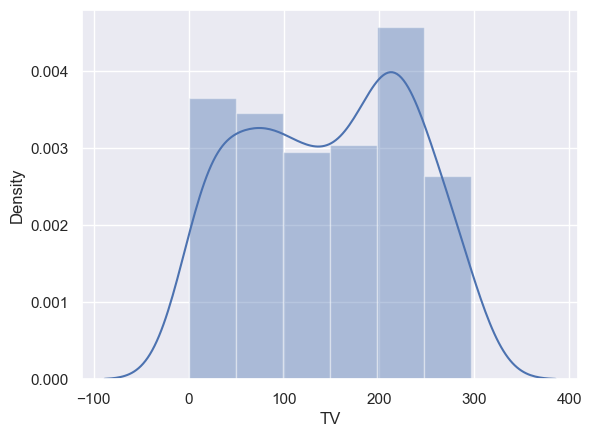

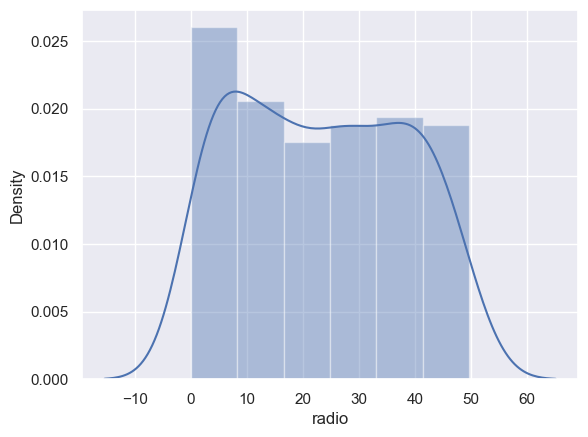

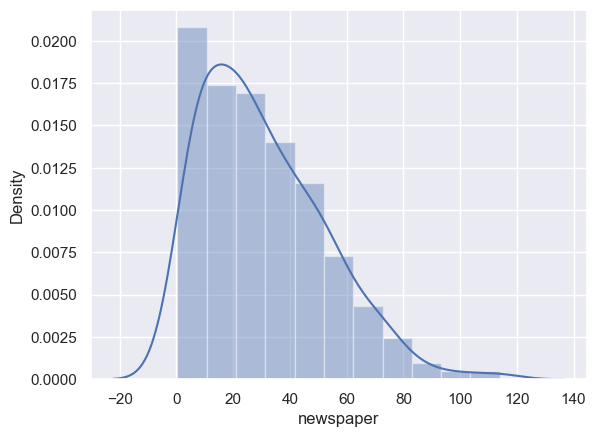

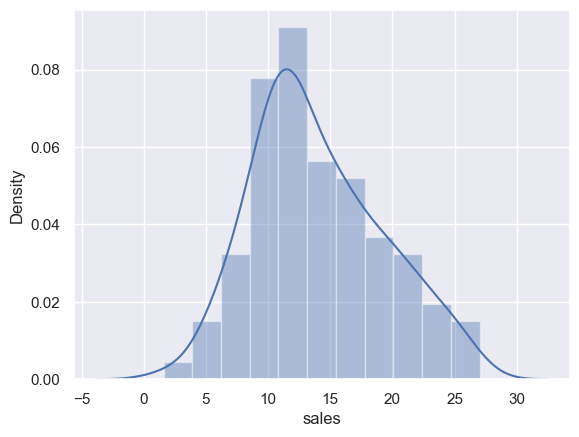

In [8]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns)[0:]:
    distplots(i)

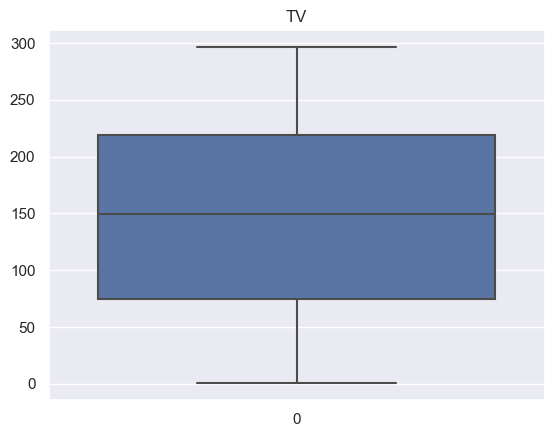

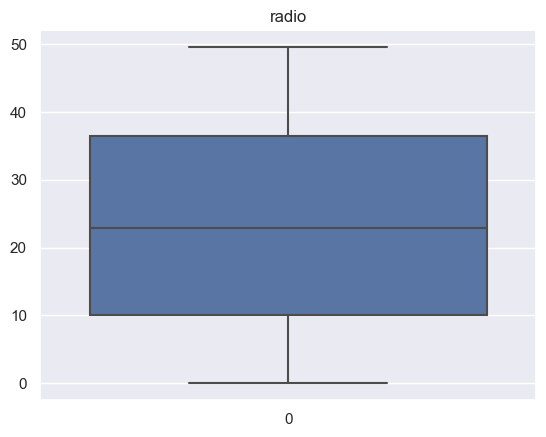

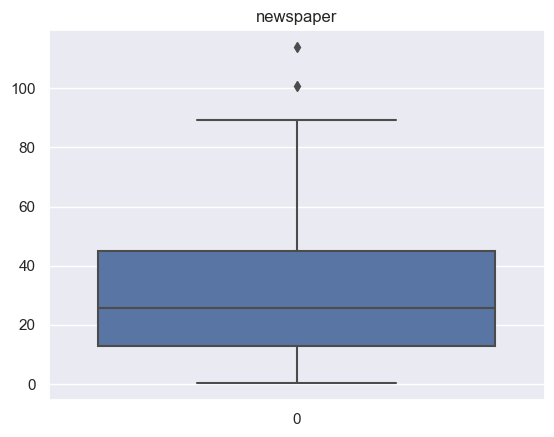

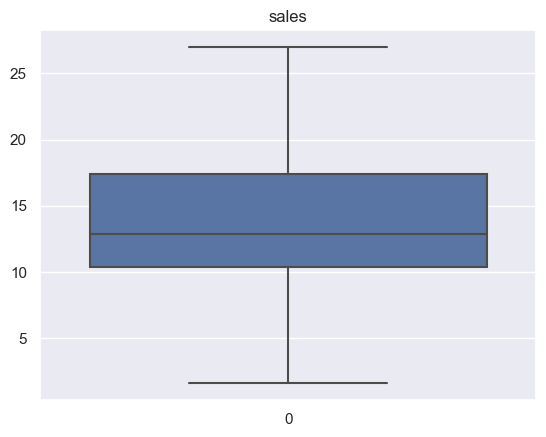

In [17]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.title(f"{col}")
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

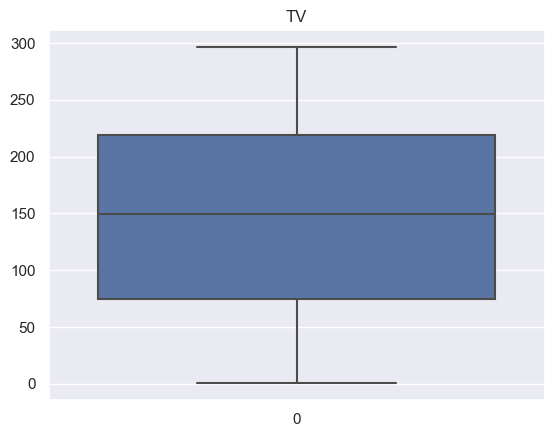

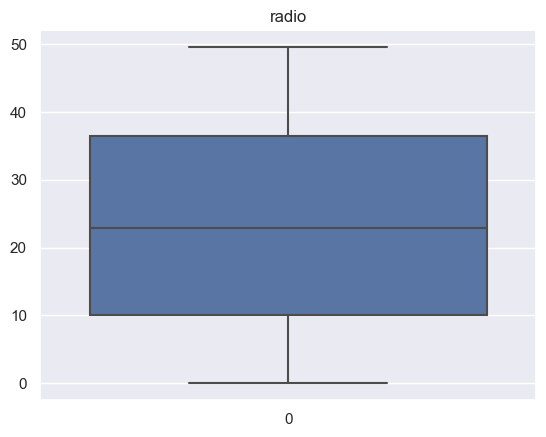

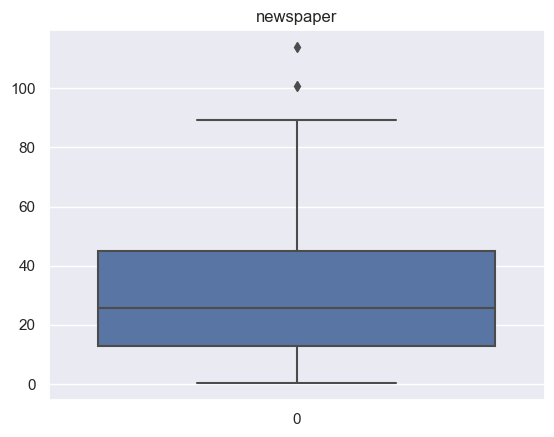

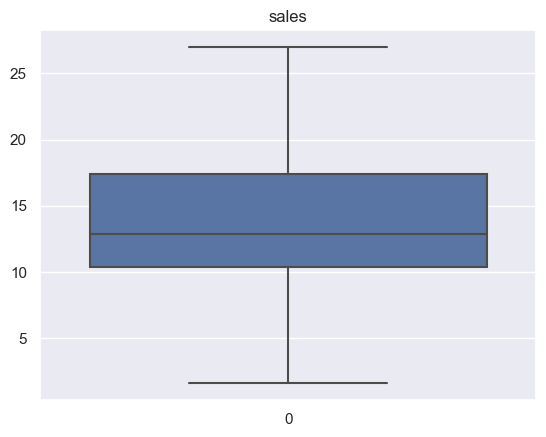

In [12]:
def boxplots(col, df):
    sns.boxplot(df[col])
    plt.title(f"{col}")
    plt.show()


for col in df.select_dtypes(exclude=['object']).columns:
    boxplots(col, df)

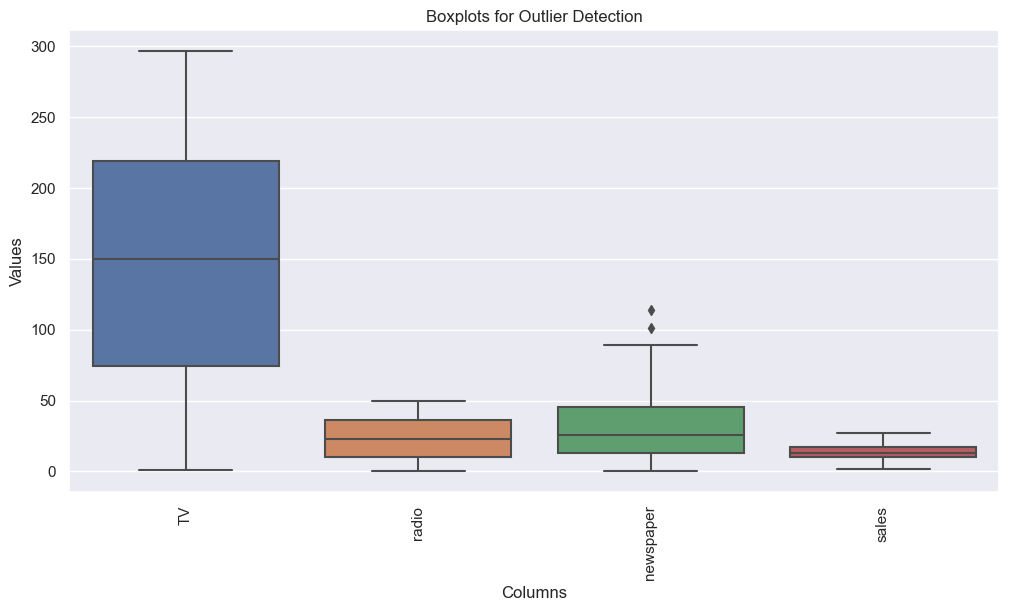

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  
plt.title("Boxplots for Outlier Detection")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

In [ ]:
sns.boxplot(df["newspaper"])
plt.show()

In [ ]:
sns.kdeplot(df["newspaper"])
plt.show()

In [ ]:
Q1=df["newspaper"].quantile(0.25)
Q2=df["newspaper"].quantile(0.50)
Q3=df["newspaper"].quantile(0.75)

IQR=Q3-Q1
print(IQR)

max_point_newspaper=Q3+IQR*1.5
min_point_newspaper=Q1-IQR*1.5
print(max_point_newspaper)
print(min_point_newspaper)

In [ ]:
#capping method on the outlier
df["newspaper"]=np.where(df["newspaper"]>max_point_newspaper,max_point_newspaper,np.where(df["newspaper"]<min_point_newspaper,min_point_newspaper,df["newspaper"]))

In [ ]:
sns.boxplot(df["newspaper"])
plt.show()

In [ ]:
corr=df.corr()
plt.figure(figsize=(10,12))
sns.heatmap(corr,annot=True,cmap="rainbow")
plt.show()


In [ ]:
#feature scaling- only with IDV
#splitting into x and y


In [ ]:
x=df.iloc[:,:3]
y=df.iloc[:,-1]

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
x.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

In [ ]:
variable=x

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i ) for i in range(variable.shape[1])]

vif['Features'] = x.columns

In [ ]:
vif

In [ ]:
#since everything is less than 5, all the IDV are significant
#checking for auto correleation using OLS method

In [ ]:
#splitting into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x_train)
pd.DataFrame(sc_x)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x_ = sc.fit_transform(x_train)
pd.DataFrame(sc_x)

In [ ]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [ ]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()
reg_model.summary()

In [ ]:
#since there is no no auto correleation - we can use linear regression and the accuracy is also good
#checking linearity
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)


In [ ]:

y_pred_price = lm.predict(x_test)
y_pred_price_train = lm.predict(x_train)

In [ ]:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_price)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_price_train)

In [ ]:
plt.scatter(y_test, y_pred_price)

In [ ]:
sns.distplot((y_test - y_pred_price), bins=20)
plt.show()

In [ ]:
sns.kdeplot(df["newspaper"])
plt.show()

In [ ]:
sns.kdeplot(df["newspaper"])
plt.show()